# Kelompok Sumber Makmur

MOHAMMAD ALIMUN HAKIM (24083010017)
      
GALIH ZAKY TRISTANAYA (24083010088)

INDRA MAULANA (24083010105)

# Deskripsi Dataset

Dataset ini berisi hasil survei mahasiswa terkait perilaku konsumsi di kantin UPN. Data mencakup latar belakang responden, pola pengeluaran, kebiasaan makan, hingga tingkat kepuasan terhadap layanan kantin. Setelah melalui proses pembersihan, normalisasi, dan transformasi, dataset memiliki struktur yang lebih rapi dan siap dianalisis.

# EKSPLORASI DATA

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import re

Import library yang diperlukan untuk transformasi dan visualisasi data

## Memanggil dan Membaca Dataset

In [ ]:
dataset = pd.read_csv('Survey_Kepuasan_Kantin.csv')
dataset.head()

,Timestamp,Email Address,Apakah Anda bersedia mengisi pertanyaan-pertanyaan berikut ini?,Nama Lengkap,NPM,Fakultas\n(Contoh: FAKULTAS ILMU KOMPUTER),Prodi\n(Contoh: SAINS DATA),Nomer Whatsapp,1. Berapa rata-rata uang yang anda habiskan sekali makan di kantin UPN? (Rp ………),2. Berapa kali dalam seminggu anda makan di kantin UPN? (…… kali),3. Berapa menit rata-rata anda menunggu antrean di kantin UPN? (…… menit),4. Berapa banyak pilihan menu yang biasanya anda beli dalam satu kali kunjungan ke kantin? (…… jenis),5. Berapa kali dalam sebulan anda menggunakan metode pembayaran QRIS di kantin UPN? (…… kali),6. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap kenyamanan kantin UPN,7. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap keterjangkauan makanan dan minuman di kantin UPN,8. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap rasa dan kualitas makanan di kantin UPN,9. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap metode pembayaran dengan qris di kantin UPN,10. seberapa sering anda merekomendasikan kantin UPN kepada teman,11. seberapa sering anda merasa antrean kantin UPN terlalu panjang?
0,9/9/2025 10:16:31,gustyjogish19@gmail.com,Ya,Gusti Jogishwara,24083010107,Fakultas Ilmu Komputer,Sains Data,081234068130,Rp. 20.000,3 kali,10 menit,2 jenis,20 kali,2,3,4,5,2,5
1,9/9/2025 10:31:48,handikasnpmb@gmail.com,Ya,Muhammad Handika Maulana Sifa,24083010036,Fakultas Ilmu Komputer,Sains Data,081319235165,15000,3,10,1,4,2,3,4,5,1,4
2,9/9/2025 10:42:43,welislash27@gmail.com,Ya,Muhammad Jazuli,24083010093,FIK,Sains Data,087885829406,19000,1-3,30,1,10-20,2,5,4,5,3,4
3,9/9/2025 10:55:19,ameliarizqynaputri@gmail.com,Ya,Amelia Rizqyna Putri,24083010042,Fakultas Ilmu Komputer,Sains Data,081250808028,Rp 20.000,2,15 menit,2,8,4,4,5,5,1,5
4,9/9/2025 11:25:09,24083010053@student.upnjatim.ac.id,Ya,Fildzah Syarafina Sumantri,24083010053,Ilmu Komputer,Sains Data,085850809909,15 ribu,1-2 kali,5-10 menit,2 jenis,5-8 kali,4,4,4,5,3,2


Membaca dataset dari file CSV dan menampilkan 5 data teratas

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 19 columns):
 #   Column                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                         --------------  ----- 
 0   Timestamp                                                                                                      173 non-null    object
 1   Email Address                                                                                                  173 non-null    object
 2   Apakah Anda bersedia mengisi pertanyaan-pertanyaan berikut ini?                                                173 non-null    object
 3   Nama Lengkap                                                                                                   173 non-null    object
 4   NPM                                                     

Menampilkan informasi struktur dataset dimana dapat diketahui bahwa hampir keseluruhan data memiliki tipe data object dan integer.

## Mendekripsikan Dataset

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
NPM,173.0,2.407443e+10,6.981376e+08,2.104301e+10,2.403301e+10,2.407101e+10,2.408301e+10,2.509101e+10
6. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap kenyamanan kantin UPN,173.0,2.491329e+00,9.741931e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
7. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap keterjangkauan makanan dan minuman di kantin UPN,173.0,3.300578e+00,8.969261e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
8. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap rasa dan kualitas makanan di kantin UPN,173.0,3.653179e+00,7.670191e-01,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
9. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap metode pembayaran dengan qris di kantin UPN,173.0,4.075145e+00,9.462998e-01,1.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
10. seberapa sering anda merekomendasikan kantin UPN kepada teman,173.0,2.497110e+00,1.108237e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
11. seberapa sering anda merasa antrean kantin UPN terlalu panjang?,173.0,3.895954e+00,1.161713e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00


Menampilkan statistik deskriptif dataset dalam bentuk transpose

In [ ]:
dataset.describe(include = 'object')

,Timestamp,Email Address,Apakah Anda bersedia mengisi pertanyaan-pertanyaan berikut ini?,Nama Lengkap,Fakultas\n(Contoh: FAKULTAS ILMU KOMPUTER),Prodi\n(Contoh: SAINS DATA),Nomer Whatsapp,1. Berapa rata-rata uang yang anda habiskan sekali makan di kantin UPN? (Rp ………),2. Berapa kali dalam seminggu anda makan di kantin UPN? (…… kali),3. Berapa menit rata-rata anda menunggu antrean di kantin UPN? (…… menit),4. Berapa banyak pilihan menu yang biasanya anda beli dalam satu kali kunjungan ke kantin? (…… jenis),5. Berapa kali dalam sebulan anda menggunakan metode pembayaran QRIS di kantin UPN? (…… kali)
count,173,173,173,173,173,173,173,173,173,173,173,173
unique,173,173,1,173,89,82,167,63,39,60,33,68
top,9/9/2025 10:16:31,gustyjogish19@gmail.com,Ya,Gusti Jogishwara,Ilmu Komputer,Sains Data,-,15,1,5 menit,2,10
freq,1,1,173,1,21,39,7,29,22,20,49,12


Menampilkan statistik deskriptif untuk data bertipe objek (kategori)

# Data Cleaning

## Mengganti nilai

In [ ]:
# ===============================================================
# PIPELINE BERSIHKAN Q1–Q5 (REPLACE LANGSUNG KE KOLOM ASLI)
# ===============================================================
# Aturan inti (rapi & konsisten):
# 1) Semua penanda range (termasuk "/") diperlakukan sebagai "atau" → "a-b".
#    Nilai final untuk range = rata-rata dua angka pertama (a+b)/2.
# 2) Q1 (Uang):
#    - "jt/juta"  → × 1_000_000
#    - "k/rb/ribu"→ × 1_000
#    - Angka polos < 1000 → × 1_000 (contoh 10 → 10_000)
#    - Bentuk tanpa angka murni → NaN
# 3) Q2 (kali/minggu), Q4 (jumlah menu), Q5 (kali/bulan):
#    - Ambil angka / range; teks murni → NaN
# 4) Q3 (waktu tunggu):
#    - Jika ada kata "jam" → (angka/rata-rata) * 60 (jadi menit)
#    - Selain itu, angka dianggap menit apa adanya
# 5) Setelah apply → paksa tipe numerik (string aneh → NaN, tidak error)
# ===============================================================

import re, numpy as np, pandas as pd

# ---------------
# (A) Nama kolom
# ---------------
COL_Q1 = "1. Berapa rata-rata uang yang anda habiskan sekali makan di kantin UPN? (Rp ………)"
COL_Q2 = "2. Berapa kali dalam seminggu anda makan di kantin UPN? (…… kali)"
COL_Q3 = "3. Berapa menit rata-rata anda menunggu antrean di kantin UPN? (…… menit)"
COL_Q4 = "4. Berapa banyak pilihan menu yang biasanya anda beli dalam satu kali kunjungan ke kantin? (…… jenis)"
COL_Q5 = "5. Berapa kali dalam sebulan anda menggunakan metode pembayaran QRIS di kantin UPN? (…… kali)"

# ------------------
# (B) Utilitas umum
# ------------------
def _norm(s: str) -> str:
    """
    Normalisasi string agar pola seragam:
    - ke huruf kecil, hapus NBSP, rapikan spasi
    - semua penanda range (—, –, 's/d', 'sampai', 'hingga', dan '/')
      diubah menjadi '-' agar diproses sebagai rentang.
    """
    s = str(s).lower().strip().replace("\xa0", " ")
    s = (s.replace("–", "-").replace("—", "-").replace("/", "-")
           .replace("s/d", "-").replace("sampai dengan", "-")
           .replace("sampai", "-").replace("hingga", "-"))
    return re.sub(r"\s+", " ", s)

def _nums(s: str):
    """
    Ekstrak semua angka dari string (mendukung desimal koma/titik).
    Mengembalikan list[float]. Jika tidak ada angka → [].
    """
    return [float(x.replace(",", ".")) for x in re.findall(r"\d+(?:[.,]\d+)?", _norm(s))]

def _pick(s: str, vs: list[float]) -> float:
    """
    Ambil nilai representatif:
    - Jika ada '-' (range) DAN minimal 2 angka → rata-rata 2 angka pertama.
    - Jika tidak range → angka pertama.
    """
    return (vs[0] + vs[1]) / 2 if "-" in _norm(s) and len(vs) >= 2 else vs[0]

# ------------------------------------
# (C) Cleaner per-pertanyaan (Q1–Q5)
# ------------------------------------
def _clean_q1_money(x):
    """
    Q1 (UANG): dukung 'Rp. 20.000', '15000', '15 ribu', '7k', 'Rp 15.000-20.000', '20k-25k', '30', dll.
    Logika skala:
      - 'jt'/'juta'  → × 1_000_000
      - 'k'/'rb'/'ribu' → × 1_000
      - angka polos < 1000 → × 1_000 (mis. 10 → 10_000)
    Tanpa angka → NaN.
    """
    if pd.isna(x):
        return np.nan
    s = _norm(x).replace(".", "").replace(" ribuan", " ribu")  # hapus pemisah ribuan; seragamkan 'ribuan'→'ribu'
    vs = _nums(s)
    if not vs:
        return np.nan
    v = _pick(s, vs)
    if ("jt" in s) or ("juta" in s):
        v *= 1_000_000
    elif re.search(r"\bribu\b|\brb\b", s) or re.search(r"\d+\s*k\b|\b\d+k\b", s):
        v *= 1_000
    elif v < 1000:
        v *= 1_000
    return float(v)

def _clean_q2_week(x):
    """
    Q2 (kali/minggu): ambil angka / range; teks murni → NaN.
    Contoh: '3 kali', '2x', '1-3' → angka; 'jarang' (tanpa angka) → NaN.
    """
    if pd.isna(x):
        return np.nan
    vs = _nums(x)
    return float(_pick(x, vs)) if vs else np.nan

def _clean_q3_minutes(x):
    """
    Q3 (menit):
    - Jika mengandung kata 'jam' → konversi jam ke menit (nilai * 60) setelah ambil angka/rata-rata.
    - Selain itu, nilai dianggap menit apa adanya.
    - '/' dianggap 'atau' (range), jadi '1/2 jam' → '1-2 jam' → rata-rata 1.5 jam → 90 menit.
    - Teks murni (tanpa angka) → NaN.
    """
    if pd.isna(x):
        return np.nan
    s = _norm(x)
    vs = _nums(s)
    if not vs:
        return np.nan
    val = _pick(s, vs)
    return float(val * 60) if "jam" in s else float(val)

def _clean_q4_count(x):
    """
    Q4 (jumlah menu): ambil angka / range; teks murni → NaN.
    Contoh: '1', '2-3', '1 atau 2' (sudah dinormalkan jadi '1-2').
    """
    if pd.isna(x):
        return np.nan
    vs = _nums(x)
    return float(_pick(x, vs)) if vs else np.nan

def _clean_q5_month(x):
    """
    Q5 (kali/bulan): ambil angka / range; teks murni → NaN.
    Contoh: '20', '10-20', '5x' → angka; kalimat tanpa angka → NaN.
    """
    if pd.isna(x):
        return np.nan
    vs = _nums(x)
    return float(_pick(x, vs)) if vs else np.nan

# ---------------------------------------------------------
# (D) APPLY: Ganti NILAI di KOLUM ASLI (nama kolom tetap)
# ---------------------------------------------------------
dataset[COL_Q1] = dataset[COL_Q1].apply(_clean_q1_money)
dataset[COL_Q2] = dataset[COL_Q2].apply(_clean_q2_week)
dataset[COL_Q3] = dataset[COL_Q3].apply(_clean_q3_minutes)
dataset[COL_Q4] = dataset[COL_Q4].apply(_clean_q4_count)
dataset[COL_Q5] = dataset[COL_Q5].apply(_clean_q5_month)

# ---------------------------------------------------------
# (E) FINAL CHECK: pastikan tipe numerik (aman dari string)
#      - String sisa otomatis jadi NaN (errors='coerce')
# ---------------------------------------------------------
for col in [COL_Q1, COL_Q2, COL_Q3, COL_Q4, COL_Q5]:
    dataset[col] = pd.to_numeric(dataset[col], errors="coerce")

Langkah ini membangun pipeline pembersihan terstandar untuk lima pertanyaan kuesioner utama. Tujuan utamanya adalah menyatukan format jawaban bebas (angka polos, rentang, satuan berbeda, teks campur angka) menjadi variabel numerik yang konsisten dan siap dianalisis—tanpa mengubah nama kolom asli. Dengan demikian, proses EDA, visualisasi, dan pemodelan tidak terganggu oleh ketidakteraturan input.

In [ ]:
from IPython.display import HTML, display
html = dataset.to_html()
display(HTML(f'<div style="max-height:600px; overflow:auto; border:1px solid #ddd">{html}</div>'))

,Timestamp,Email Address,Apakah Anda bersedia mengisi pertanyaan-pertanyaan berikut ini?,Nama Lengkap,NPM,Fakultas (Contoh: FAKULTAS ILMU KOMPUTER),Prodi (Contoh: SAINS DATA),Nomer Whatsapp,1. Berapa rata-rata uang yang anda habiskan sekali makan di kantin UPN? (Rp ………),2. Berapa kali dalam seminggu anda makan di kantin UPN? (…… kali),3. Berapa menit rata-rata anda menunggu antrean di kantin UPN? (…… menit),4. Berapa banyak pilihan menu yang biasanya anda beli dalam satu kali kunjungan ke kantin? (…… jenis),5. Berapa kali dalam sebulan anda menggunakan metode pembayaran QRIS di kantin UPN? (…… kali),6. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap kenyamanan kantin UPN,7. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap keterjangkauan makanan dan minuman di kantin UPN,8. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap rasa dan kualitas makanan di kantin UPN,9. Pada skala 1 - 5 berapa nilai yang anda berikan terhadap metode pembayaran dengan qris di kantin UPN,10. seberapa sering anda merekomendasikan kantin UPN kepada teman,11. seberapa sering anda merasa antrean kantin UPN terlalu panjang?
0,9/9/2025 10:16:31,gustyjogish19@gmail.com,Ya,Gusti Jogishwara,24083010107,Fakultas Ilmu Komputer,Sains Data,081234068130,20000.0,3.0,10.0,2.0,20.0,2,3,4,5,2,5
1,9/9/2025 10:31:48,handikasnpmb@gmail.com,Ya,Muhammad Handika Maulana Sifa,24083010036,Fakultas Ilmu Komputer,Sains Data,081319235165,15000.0,3.0,10.0,1.0,4.0,2,3,4,5,1,4
2,9/9/2025 10:42:43,welislash27@gmail.com,Ya,Muhammad Jazuli,24083010093,FIK,Sains Data,087885829406,19000.0,2.0,30.0,1.0,15.0,2,5,4,5,3,4
3,9/9/2025 10:55:19,ameliarizqynaputri@gmail.com,Ya,Amelia Rizqyna Putri,24083010042,Fakultas Ilmu Komputer,Sains Data,081250808028,20000.0,2.0,15.0,2.0,8.0,4,4,5,5,1,5
4,9/9/2025 11:25:09,24083010053@student.upnjatim.ac.id,Ya,Fildzah Syarafina Sumantri,24083010053,Ilmu Komputer,Sains Data,085850809909,15000.0,1.5,7.5,2.0,6.5,4,4,4,5,3,2
5,9/9/2025 11:26:57,kazerake@gmail.com,Ya,Muhammad Haikal Pasya Abdillah,24083010052,Ilmu Komputer,Sains Data,081235257255,17000.0,1.0,15.0,2.0,1.0,3,4,4,4,2,5
6,9/9/2025 11:29:44,asti.permataanugerah@gmail.com,Ya,Asti In'am Yusriah,24083010067,Ilmu Komputer,Sauns Data,083896806750,20000.0,1.0,5.0,2.0,3.0,2,3,3,5,2,2
7,9/9/2025 11:42:45,danisharizkaa@gmail.com,Ya,Danisha Rizka Hapsari,24083010010,Fakultas Ilmu Komputer,Sains Data,082323871033,18000.0,1.0,7.0,2.0,4.0,1,4,4,5,1,2
8,9/9/2025 11:45:13,danishofi6@gmail.com,Ya,Dani Shofi Nur Izza,24083010124,Ilmu Komputer,Sains Data,083806336344,15000.0,1.0,5.0,1.0,4.0,3,4,4,5,3,2
9,9/9/2025 11:47:21,zaldiabdulhadi241@gmail.com,Ya,Zaldi Abdul Hadi,24083010002,Ilmu Komputer,Sains Data,085136086754,20000.0,1.0,15.0,2.0,4.0,3,4,3,4,3,3


Setelah dataset berhasil ditampilkan, tahap berikutnya adalah menyederhanakan nama kolom. Semula kolom masih berupa kalimat panjang sesuai pertanyaan kuesioner, sehingga kurang praktis dipakai dalam analisis. Melalui proses rename, setiap kolom dipetakan ke nama baru yang lebih ringkas dan deskriptif, misalnya rata_rata_uang, waktu_tunggu_menit, hingga skala_rasa(1-5).

Dengan perubahan ini, dataset kini memiliki struktur yang lebih jelas, konsisten, dan mudah dipanggil kembali. Hal ini juga mempermudah tahap eksplorasi dan visualisasi selanjutnya karena nama variabel sudah singkat namun tetap informatif.

## Mengubah nama kolom pertanyaan

In [ ]:
# peta nama baru
map_q = {
  1: "rata_rata_uang",
  2: "frekuensi_makan_seminggu",
  3: "waktu_tunggu_menit",
  4: "jumlah_menu",
  5: "frekuensi_qris_sebulan",
  6: "skala_kenyamanan(1-5)",
  7: "skala_harga(1-5)",
  8: "skala_rasa(1-5)",
  9: "skala_qris(1-5)",
  10:"skala_rekomendasi(1-5)",
  11:"skala_antrean(1-5)",
}

# fungsi rename: ambil nomor di awal kolom (mis. "pertanyaan 3", "3. ....") lalu map
dataset.rename(
    columns=lambda c: map_q.get(int(m.group(1)), c)
    if (m:=re.match(r"^\s*(?:pertanyaan\s*)?(\d+)", str(c).lower())) else c,
    inplace=True)

Setelah dataset ditampilkan secara utuh, langkah berikutnya adalah menyederhanakan nama kolom agar lebih praktis digunakan. Nama kolom yang semula masih berupa kalimat panjang dari pertanyaan kuesioner kini dipetakan ke bentuk variabel ringkas seperti rata_rata_uang, waktu_tunggu_menit, hingga skala_rasa(1-5).

Perubahan ini membuat struktur data menjadi lebih teratur dan konsisten, sehingga proses pemanggilan kolom dalam analisis berikutnya dapat dilakukan dengan mudah. Dengan begitu, alur eksplorasi data akan terasa lebih efisien karena setiap variabel sudah memiliki identitas yang jelas sekaligus tetap mencerminkan makna aslinya.

dataset tersebut sudah siap masuk ke tahap pengecekan kualitas data seperti missing values maupun distribusi awal tiap variabel.

## Menyamakan nama fakultas dan prodi

In [ ]:
# --- deteksi kolom otomatis ---
COL_FAK  = next(c for c in dataset.columns if 'fakultas' in str(c).lower())
COL_PROD = next(c for c in dataset.columns if any(k in str(c).lower() for k in ['prodi','program studi','jurusan','program']))

# --- normalizer: lowercase, buang tanda baca/nbspace, rapikan spasi ---
norm = lambda s: re.sub(r'\s+',' ', re.sub(r'[^a-z0-9]+',' ', str(s).lower().replace('\xa0',' '))).strip()

# --- Mapping ---
FAC = {
 "FIK": [
   "fakultas ilmu komputer","ilmu komputer","fik","fasilkom","fakultas ilmu kompute"
 ],
 "FTS": [
   "fakultas teknik dan sains","teknik dan sains","fts","teknik","teknin dan sains","falkutas teknik dan sains"
 ],
 "FISIBPOL": [
   "fisip","fisipbol","ilmu sosial dan ilmu politik","ilmu sosial, budaya, dan politik",
   "fakultas ilmu sosial budaya dan politik","fakultas ilmu sosial, budaya dan politik",
   "fakultas ilmu sosial dan politik","ilmu sosial budaya dan politik", "FAKULTAS ILMU SOSIAL BUDAYA POLITIK", "FAKULTAS ILMU SOSIAL DAN ILMU POLITIK",
    "FAKULTAS ILMU SOSIAL, BUDAYA DAN ILMU POLITIK", "Fakultas Ilmu Sosial, Budaya, dan Politil"
 ],
 "FEB": ["feb","ekonomi dan bisnis","fakultas ekonomi dan bisnis"],
 "FH": ["fakultas hukum","hukum"],
 "FAD": ["fakultas arsitektur dan desain","fad"],
 "FP": ["fakultas pertanian"],
 "FK": ["fakultas kedokteran","kedokteran"],
}
PROD = {
 "Sains Data": ["sains data","sauns data"],
 "Informatika": ["informatika"],
 "Sistem Informasi": ["sistem informasi","si"],
 "Teknik Kimia": ["teknik kimia"],
 "Teknik Industri": ["teknik industri"],
 "Teknik Mesin": ["teknik mesin"],
 "Teknik Sipil": ["teknik sipil"],
 "Teknologi Pangan": ["teknologi pangan","tekpang"],
 "Agroteknologi": ["agroteknologi"],
 "Arsitektur": ["arsitektur"],
 "Desain Komunikasi Visual": ["desain komunikasi visual","dkv"],
 "Ilmu Komunikasi": ["ilmu komunikasi","ikom","ilkom"],
 "Ilmu Hukum": ["ilmu hukum","hukum"],
 "Administrasi Publik": ["administrasi publik","adpub"],
 "Administrasi Bisnis": ["administrasi bisnis","adbis"],
 "Akuntansi": ["akuntansi","akt"],
 "Manajemen": ["manajemen"],
 "Ekonomi Pembangunan": ["ekonomi pembangunan"],
 "Kewirausahaan": ["kewirausahaan"],
 "Bisnis Digital": ["bisnis digital","bisdig"],
 "Hubungan Internasional": ["hubungan internasional","hi"],
 "Pariwisata": ["pariwisata"],
 "Bahasa Inggris untuk Komunikasi Bisnis dan Profesional": ["bahasa inggris untuk komunikasi bisnis dan profesional"],
 "Kedokteran": ["kedokteran"],
}

# --- flatten kamus (key = bentuk yang sudah dinormalisasi) ---
def flatten(book):
    out = {}
    for canon, aliases in book.items():
        for a in [canon, *aliases]:
            out[norm(a)] = canon
    return out

FACMAP, PRODMAP = flatten(FAC), flatten(PROD)

# --- OVERWRITE kolom asli; jika tak ketemu → pakai nilai awal (biar "kelihatan" berubah) ---
dataset[COL_FAK]  = dataset[COL_FAK].map(lambda x: FACMAP.get(norm(x), str(x).strip()))
dataset[COL_PROD] = dataset[COL_PROD].map(lambda x: PRODMAP.get(norm(x), str(x).strip()))

Pada tahap ini menyeragamkan isian kategorikal untuk Fakultas dan Prodi yang sering ditulis beragam (singkatan, salah ketik, atau ejaan berbeda). Dengan menormalkan teks (lowercase, buang tanda baca/spasi ganda) lalu memetakan berbagai alias ke nama kanonik (mis. “fasilkom” → FIK, “bisdig” → Bisnis Digital), nilai pada kolom asli ditimpa menjadi seragam dan konsisten. Pendekatan ini memudahkan grouping, pivot, dan visualisasi tanpa duplikasi kategori, sekaligus menjaga keterlacakan karena entri yang tidak cocok tetap dibiarkan apa adanya sehingga anomali mudah terdeteksi untuk koreksi selanjutnya.

## Mengubah nama kolom fakultas dan prodi

In [ ]:
dataset.rename(columns={
    'Fakultas\n(Contoh: FAKULTAS ILMU KOMPUTER)': 'Fakultas',
    'Prodi\n(Contoh: SAINS DATA)': 'Prodi'
}, inplace=True)

Setelah nilai pada kolom Fakultas dan Prodi berhasil dinormalisasi, langkah ini dilanjutkan dengan menyederhanakan nama header kolom yang semula masih memuat contoh panjang (misalnya “Fakultas (Contoh: FAKULTAS ILMU KOMPUTER)”) menjadi cukup “Fakultas” dan “Prodi”.

Dengan perubahan ini, dataset menjadi lebih bersih dan ringkas, sehingga saat analisis maupun visualisasi, pemanggilan kolom jauh lebih sederhana dan tidak menimbulkan kebingungan. Ini juga menegaskan konsistensi antara isi kolom yang sudah dinormalisasi dengan label kolom yang jelas dan praktis.

## Menghapus kolom yang tidak relevan

In [ ]:
# Daftar kolom yang akan dihapus
kolom_untuk_dihapus = [
    'Timestamp',
    'Email Address',
    'Apakah Anda bersedia mengisi pertanyaan-pertanyaan berikut ini?',
    'Nomer Whatsapp'
]
# Menghapus kolom dari DataFrame 'dataset'
dataset.drop(columns=kolom_untuk_dihapus, inplace=True)

Setelah kolom utama dinormalisasi dan disederhanakan, tahap selanjutnya adalah menghapus variabel yang tidak relevan dengan analisis inti, seperti Timestamp, Email Address, Nomor WhatsApp, dan pertanyaan persetujuan awal.

Penghapusan ini bertujuan agar dataset lebih fokus pada variabel yang benar-benar dibutuhkan, sekaligus menjaga privasi responden. Dengan begitu, struktur data menjadi lebih ringkas, bersih, dan siap dipakai untuk tahap eksplorasi maupun pemodelan tanpa adanya gangguan informasi tambahan yang tidak diperlukan.

In [ ]:
from IPython.display import HTML, display
html = dataset.to_html()
display(HTML(f'<div style="max-height:600px; overflow:auto; border:1px solid #ddd">{html}</div>'))

,Nama Lengkap,NPM,Fakultas,Prodi,rata_rata_uang,frekuensi_makan_seminggu,waktu_tunggu_menit,jumlah_menu,frekuensi_qris_sebulan,skala_kenyamanan(1-5),skala_harga(1-5),skala_rasa(1-5),skala_qris(1-5),skala_rekomendasi(1-5),skala_antrean(1-5)
0,Gusti Jogishwara,24083010107,FIK,Sains Data,20000.0,3.0,10.0,2.0,20.0,2,3,4,5,2,5
1,Muhammad Handika Maulana Sifa,24083010036,FIK,Sains Data,15000.0,3.0,10.0,1.0,4.0,2,3,4,5,1,4
2,Muhammad Jazuli,24083010093,FIK,Sains Data,19000.0,2.0,30.0,1.0,15.0,2,5,4,5,3,4
3,Amelia Rizqyna Putri,24083010042,FIK,Sains Data,20000.0,2.0,15.0,2.0,8.0,4,4,5,5,1,5
4,Fildzah Syarafina Sumantri,24083010053,FIK,Sains Data,15000.0,1.5,7.5,2.0,6.5,4,4,4,5,3,2
5,Muhammad Haikal Pasya Abdillah,24083010052,FIK,Sains Data,17000.0,1.0,15.0,2.0,1.0,3,4,4,4,2,5
6,Asti In'am Yusriah,24083010067,FIK,Sains Data,20000.0,1.0,5.0,2.0,3.0,2,3,3,5,2,2
7,Danisha Rizka Hapsari,24083010010,FIK,Sains Data,18000.0,1.0,7.0,2.0,4.0,1,4,4,5,1,2
8,Dani Shofi Nur Izza,24083010124,FIK,Sains Data,15000.0,1.0,5.0,1.0,4.0,3,4,4,5,3,2
9,Zaldi Abdul Hadi,24083010002,FIK,Sains Data,20000.0,1.0,15.0,2.0,4.0,3,4,3,4,3,3


Setelah kolom-kolom tidak relevan dihapus, dataset kembali ditampilkan dalam bentuk tabel HTML yang bisa digulir. Langkah ini berfungsi sebagai pengecekan ulang untuk memastikan bahwa struktur data kini sudah lebih ringkas: hanya berisi kolom yang relevan, dengan nama yang sederhana, serta isi yang telah dinormalisasi.

Tampilan ini memberikan gambaran bahwa dataset siap memasuki tahap eksplorasi awal, seperti pemeriksaan missing values dan distribusi variabel, tanpa terganggu oleh entri atau kolom tambahan yang tidak diperlukan.

## Mengecek nilai duplikat

In [ ]:
jumlah_duplikat = dataset.duplicated().sum()
print(f"Jumlah baris duplikat yang ditemukan: {jumlah_duplikat}")

Jumlah baris duplikat yang ditemukan: 0


Tahap ini mengecek apakah terdapat baris data yang terduplikasi di dalam dataset. Hasil perhitungan menampilkan jumlah duplikat yang ditemukan, sehingga kita bisa mengetahui potensi adanya responden yang tercatat lebih dari sekali.

Dengan identifikasi ini, dataset menjadi lebih terkendali kualitasnya, karena duplikasi dapat menimbulkan bias pada analisis. Jika ditemukan, langkah selanjutnya adalah menghapus baris duplikat agar setiap responden hanya terhitung sekali dalam perhitungan maupun pemodelan.

Berdasarkan output dapat diketahui bahwa jumlah baris duplikat yang ditemukan adalah 0 sehingga dikarenakan tidak ditemukan adanya nilai duplikat maka tidak perlu melakukan langkah untuk menghapus baris duplikat.

## MISSING VALUES

### Identifikasi missing values

In [ ]:
np.sum(dataset.isnull()).sort_values(ascending=False)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
frekuensi_qris_sebulan,6
frekuensi_makan_seminggu,2
NPM,0
Fakultas,0
Prodi,0
rata_rata_uang,0
Nama Lengkap,0
waktu_tunggu_menit,0
jumlah_menu,0
skala_kenyamanan(1-5),0


Setelah memastikan tidak ada duplikasi, langkah ini berfokus pada mengecek jumlah nilai kosong (missing values) di setiap kolom. Hasilnya menunjukkan kolom mana yang masih memiliki data hilang dan seberapa banyak jumlahnya.

Informasi ini penting untuk menentukan strategi penanganan missing values, apakah dengan menghapus baris tertentu, mengganti dengan nilai rata-rata/median, atau melakukan imputasi lain. Dengan begitu, dataset dapat tetap lengkap dan konsisten sebelum masuk ke tahap analisis lebih lanjut.

Berdasarkan output dapat diketahui bahwa terdapat 2 kolom yang memiliki missing values yaitu kolom frekuensi_qris_sebulan sebanyak 6 dan frekuensi_makan_seminggu sebanyak 2.

In [ ]:
missing_percent = dataset.isnull().mean().sort_values(ascending=False) * 100
print(round(missing_percent,2))

frekuensi_qris_sebulan      3.47
frekuensi_makan_seminggu    1.16
NPM                         0.00
Fakultas                    0.00
Prodi                       0.00
rata_rata_uang              0.00
Nama Lengkap                0.00
waktu_tunggu_menit          0.00
jumlah_menu                 0.00
skala_kenyamanan(1-5)       0.00
skala_harga(1-5)            0.00
skala_rasa(1-5)             0.00
skala_qris(1-5)             0.00
skala_rekomendasi(1-5)      0.00
skala_antrean(1-5)          0.00
dtype: float64


Setelah menghitung jumlah nilai kosong, tahap ini menampilkan persentase missing values di setiap kolom. Dengan cara ini, kita bisa melihat tingkat kelengkapan data secara proporsional, bukan hanya dari jumlah absolut.

Hasil persentase ini membantu dalam pengambilan keputusan: kolom dengan missing values kecil biasanya bisa diimputasi, sedangkan kolom dengan persentase tinggi mungkin lebih baik dipertimbangkan untuk dihapus. Dengan demikian, dataset tetap terjaga kualitasnya dan siap digunakan pada tahap analisis berikutnya.

Berdasarkan output dapat diketahui bahwa persentase dari kolom yang terdapat missing values terdapat 2 nilai yaitu pada kolom frekuensi_qris_sebulan sebesar 3.47 dan frekuensi_makan_seminggu sebesar 1.16 yang dimana kedua nilai tersebut tergolong kexil dan mudah untuk diatasi

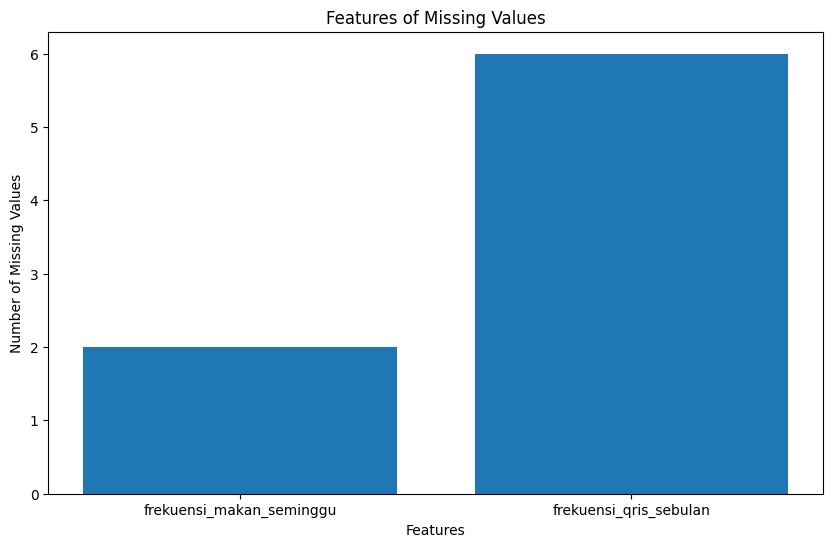

In [ ]:
dataset_missing = dataset.isnull().sum()
dataset_missing = dataset_missing[dataset_missing > 0]

plt.figure(figsize=(10, 6))
plt.bar(dataset_missing.index, dataset_missing.values)
plt.title('Features of Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

Tahap ini menampilkan visualisasi jumlah nilai kosong dalam bentuk diagram batang. Dari grafik terlihat bahwa:

Kolom frekuensi_makan_seminggu memiliki beberapa entri kosong, namun jumlahnya relatif kecil.

Kolom frekuensi_qris_sebulan memiliki jumlah missing values yang lebih banyak dibanding kolom lain.

Visualisasi ini memberikan gambaran cepat mengenai kolom mana yang paling bermasalah dalam hal kelengkapan data. Dengan informasi ini, langkah selanjutnya bisa diarahkan pada strategi imputasi atau penghapusan data agar kualitas dataset tetap terjaga sebelum analisis lanjutan dilakukan.

### Imputasi missing values

In [ ]:
# Ganti 'dataset' dengan nama DataFrame Anda

# 1. Menghitung median untuk setiap kolom
median_qris = dataset['frekuensi_qris_sebulan'].median()
median_makan = dataset['frekuensi_makan_seminggu'].median()

# 2. Mengisi nilai hilang dengan cara yang direkomendasikan (tanpa inplace=True)
dataset['frekuensi_qris_sebulan'] = dataset['frekuensi_qris_sebulan'].fillna(median_qris)
dataset['frekuensi_makan_seminggu'] = dataset['frekuensi_makan_seminggu'].fillna(median_makan)

Setelah diketahui kolom mana yang memiliki nilai kosong, tahap ini melakukan imputasi dengan mengganti nilai hilang menggunakan median dari masing-masing kolom. Strategi ini dipilih karena median lebih tahan terhadap outlier, sehingga nilai pengganti tetap representatif tanpa terdistorsi oleh data ekstrem.

Dengan pengisian ini, kolom frekuensi_qris_sebulan dan frekuensi_makan_seminggu kini sudah lengkap tanpa missing values, sehingga dataset menjadi lebih stabil dan siap untuk tahap eksplorasi distribusi maupun analisis statistik berikutnya.

### Mengecek apakah missing values sudah teratasi

In [ ]:
# Cek kembali untuk memastikan sudah tidak ada nilai yang hilang
print("Jumlah missing values setelah diperbaiki:")
print(dataset.isnull().sum())

Jumlah missing values setelah diperbaiki:
Nama Lengkap                0
NPM                         0
Fakultas                    0
Prodi                       0
rata_rata_uang              0
frekuensi_makan_seminggu    0
waktu_tunggu_menit          0
jumlah_menu                 0
frekuensi_qris_sebulan      0
skala_kenyamanan(1-5)       0
skala_harga(1-5)            0
skala_rasa(1-5)             0
skala_qris(1-5)             0
skala_rekomendasi(1-5)      0
skala_antrean(1-5)          0
dtype: int64


Langkah ini mengecek ulang kondisi dataset setelah proses pengisian nilai kosong dengan median. Hasil pengecekan menunjukkan bahwa seluruh kolom kini tidak lagi memiliki missing values.

Dengan demikian, dataset sudah lengkap dan bersih, sehingga dapat dipakai dengan aman untuk tahap eksplorasi data lebih lanjut, seperti analisis distribusi, deteksi outlier, maupun visualisasi tanpa perlu khawatir adanya data yang hilang.

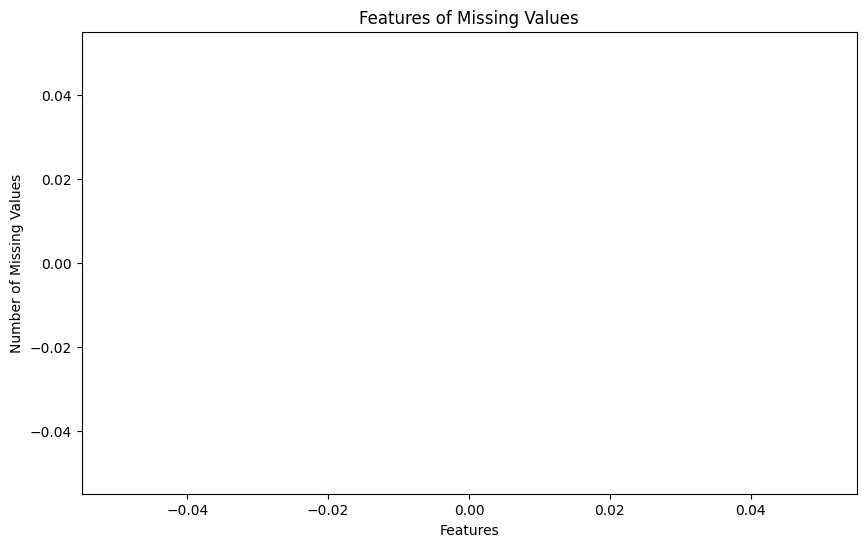

In [ ]:
dataset_missing = dataset.isnull().sum()
dataset_missing = dataset_missing[dataset_missing > 0]

plt.figure(figsize=(10, 6))
plt.bar(dataset_missing.index, dataset_missing.values)
plt.title('Features of Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

Grafik ini menampilkan kembali distribusi missing values setelah dilakukan imputasi dengan median. Hasilnya terlihat tidak ada lagi batang yang muncul, yang berarti seluruh kolom kini sudah bebas dari nilai kosong.

Visualisasi ini menjadi bukti bahwa proses penanganan missing values berhasil, sehingga dataset telah siap dipakai untuk tahap analisis lanjutan dengan kondisi yang lengkap, bersih, dan konsisten.

## OUTLIER

### Mengecek outlier dengan boxplot

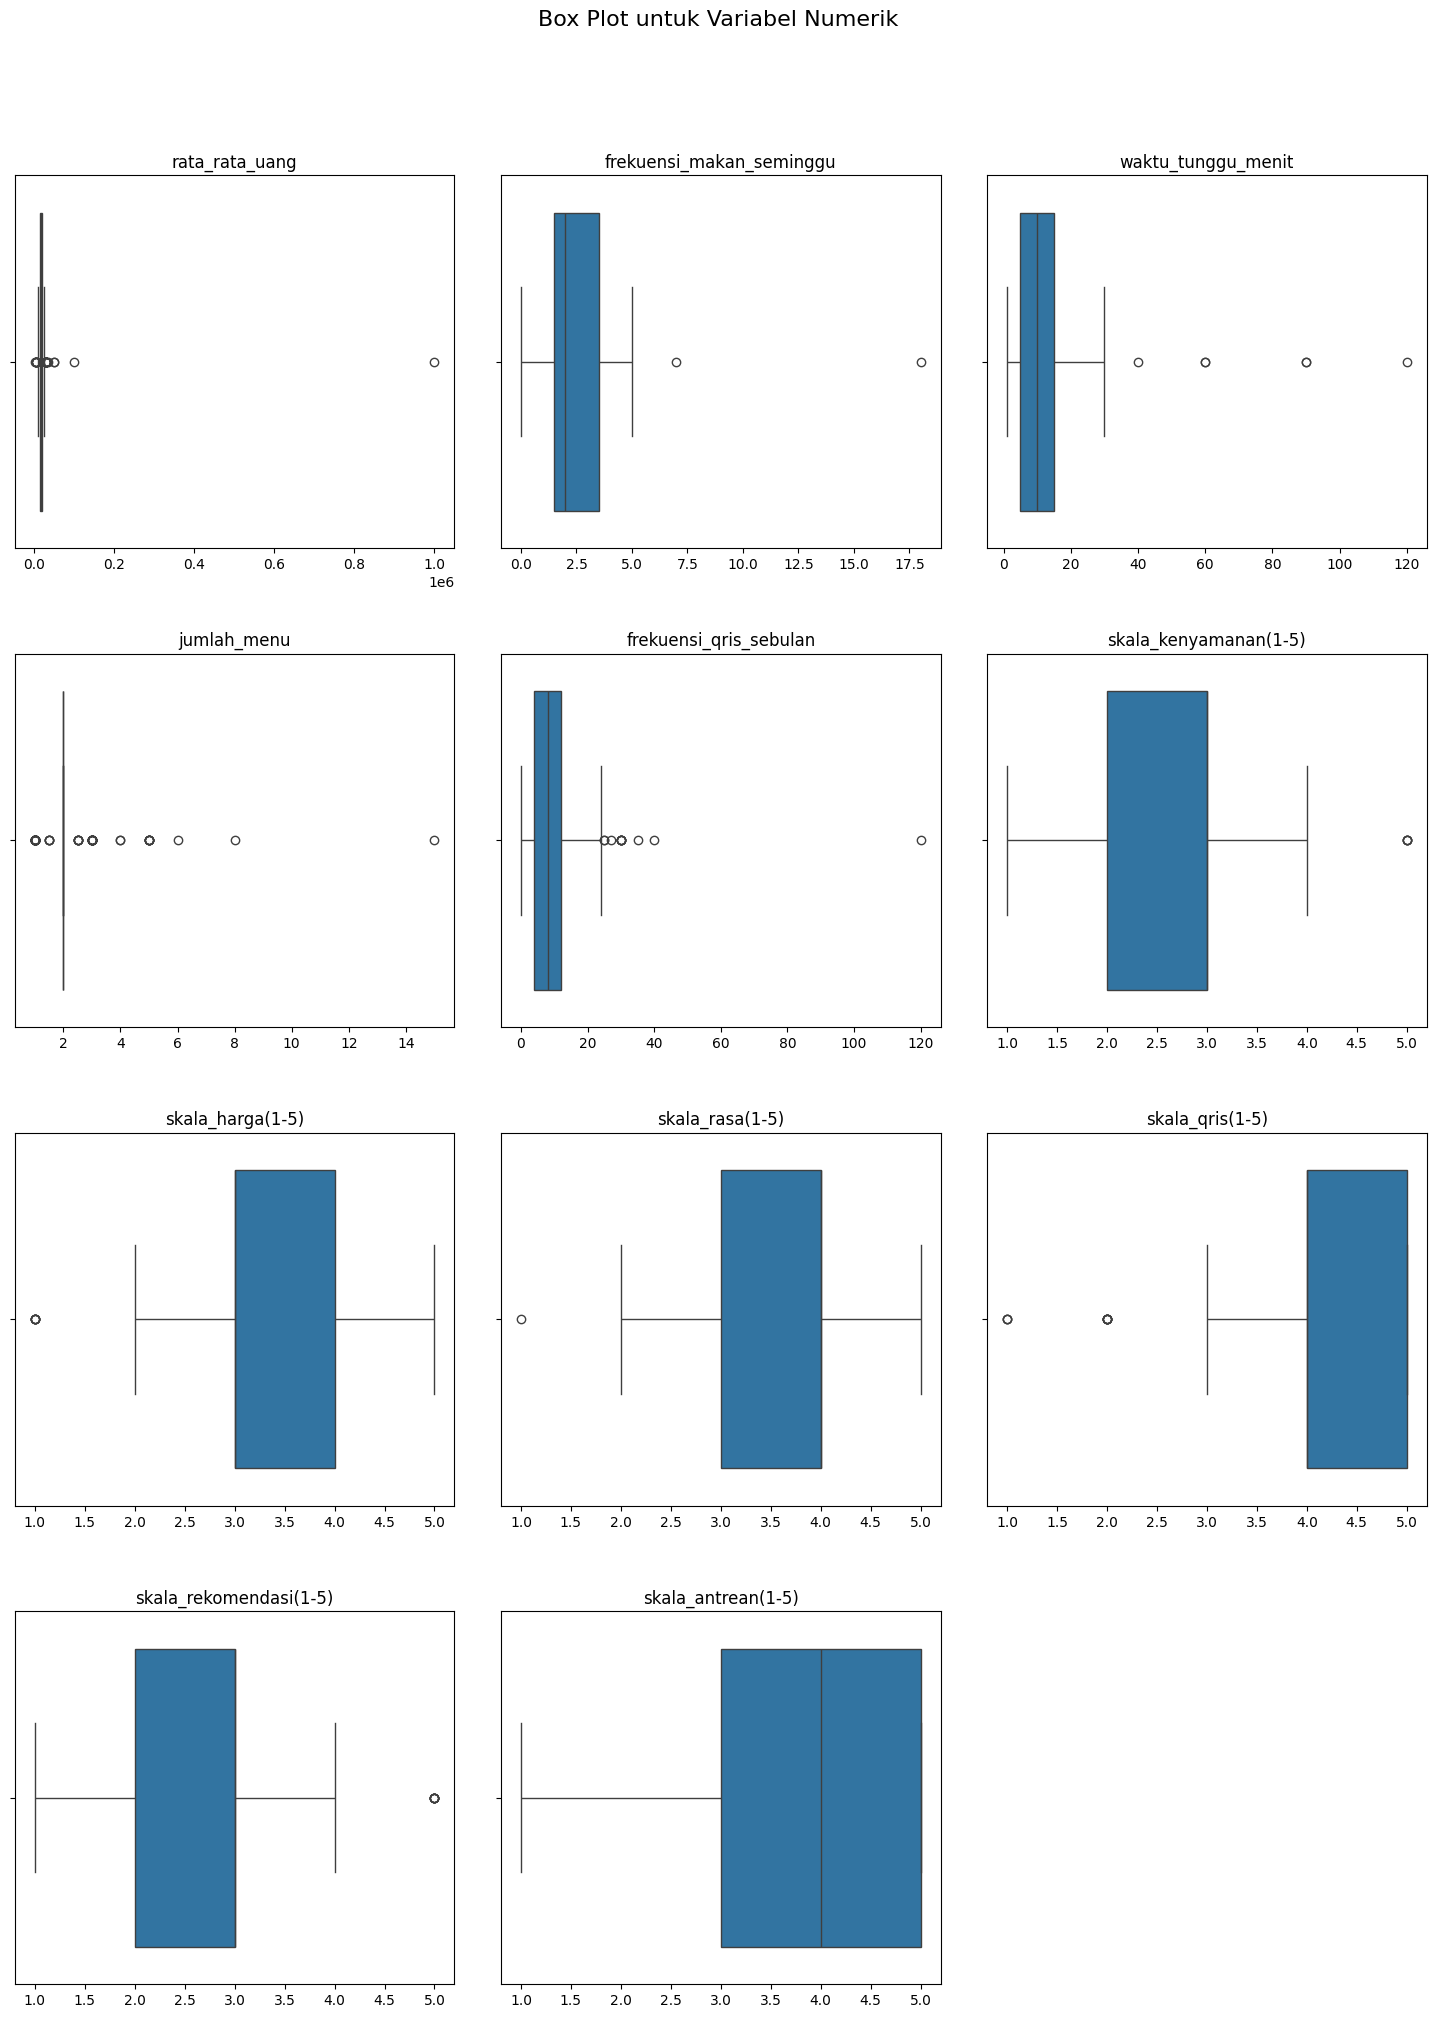

In [ ]:
# Kolom yang ingin dicek
kolom = [
    'rata_rata_uang',
    'frekuensi_makan_seminggu',
    'waktu_tunggu_menit',
    'jumlah_menu',
    'frekuensi_qris_sebulan',
    'skala_kenyamanan(1-5)',
    'skala_harga(1-5)',
    'skala_rasa(1-5)',
    'skala_qris(1-5)',
    'skala_rekomendasi(1-5)',
    'skala_antrean(1-5)'
]

import math
# Membuat plot
jumlah_kolom = len(kolom)
cols_per_row = 3
rows_needed = math.ceil(jumlah_kolom / cols_per_row)
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 5))
fig.suptitle('Box Plot untuk Variabel Numerik', fontsize=16, y=1.02)
axes = axes.flatten()

for i, kolom_nama in enumerate(kolom):
    ax = axes[i]
    sns.boxplot(x=dataset[kolom_nama], ax=ax)
    ax.set_title(kolom_nama)
    ax.set_xlabel('')

for i in range(jumlah_kolom, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

Setelah dataset bebas dari missing values, langkah selanjutnya adalah meninjau distribusi variabel numerik melalui boxplot. Visualisasi ini memperlihatkan bahwa:

* Beberapa variabel seperti rata_rata_uang, frekuensi_makan_seminggu, waktu_tunggu_menit, dan frekuensi_qris_sebulan memiliki outlier yang cukup menonjol, terlihat dari titik yang jauh berada di luar whisker.

* Variabel skala penilaian (1–5) seperti skala_rasa(1-5), skala_kenyamanan(1-5), maupun skala_antrean(1-5) umumnya berada dalam rentang normal, dengan hanya sedikit nilai ekstrem.

Dengan demikian, boxplot ini tidak hanya menegaskan bahwa dataset sudah bersih dari nilai kosong, tetapi juga memberikan gambaran tentang sebaran data dan keberadaan nilai ekstrem. Informasi ini penting sebagai dasar untuk memutuskan apakah outlier akan ditangani lebih lanjut atau dibiarkan karena masih mewakili variasi nyata dalam jawaban responden.

### Mengatasi outlier

In [ ]:
# Kolom yang diimputasi
kolom = [
    'rata_rata_uang',
    'frekuensi_makan_seminggu',
    'waktu_tunggu_menit',
    'jumlah_menu',
    'frekuensi_qris_sebulan',
   'skala_kenyamanan(1-5)',
    'skala_harga(1-5)',
    'skala_rasa(1-5)',
    'skala_qris(1-5)'
]
# Imputasi
for kolom in kolom:
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    dataset[kolom] = np.where(
        dataset[kolom] > batas_atas, batas_atas,
        np.where(dataset[kolom] < batas_bawah, batas_bawah, dataset[kolom]))
print("Proses penanganan outlier dengan capping selesai.")

Proses penanganan outlier dengan capping selesai.


Setelah outlier terdeteksi melalui boxplot, tahap ini melakukan penanganan outlier menggunakan metode capping berbasis IQR. Nilai yang berada di bawah batas bawah atau di atas batas atas digantikan dengan nilai ambang terdekat (batas bawah atau batas atas).

Dengan strategi ini, sebaran data tetap terjaga dalam rentang wajar tanpa menghapus observasi, sehingga tidak ada kehilangan informasi. Hasilnya, dataset menjadi lebih stabil dan representatif untuk analisis statistik maupun pemodelan, karena dampak dari nilai ekstrem yang terlalu jauh berhasil diminimalisir.

### Menampilkan boxplot setelah outlier diatasi

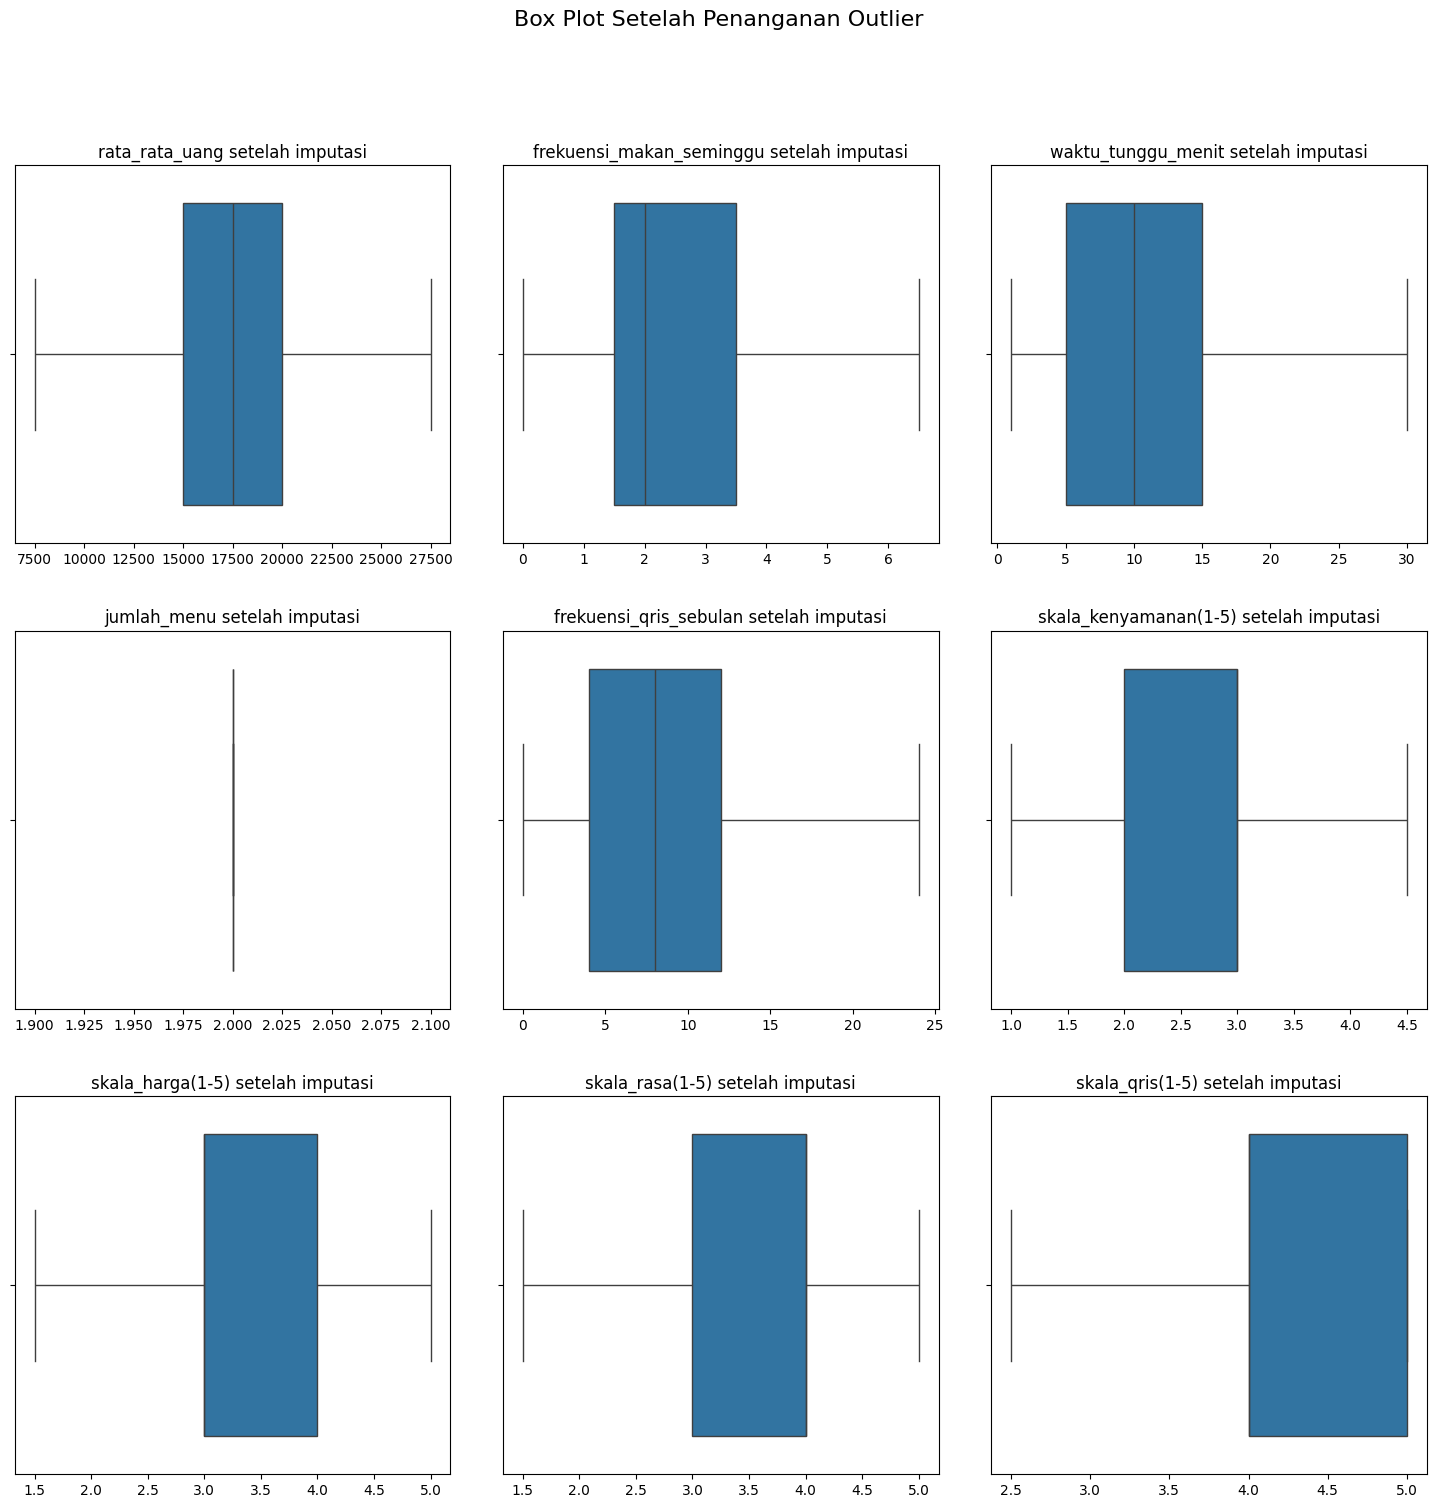

In [ ]:
# Kolom yang diimputasi (sama seperti di cell sebelumnya)
kolom_setelah_outlier = [
    'rata_rata_uang',
    'frekuensi_makan_seminggu',
    'waktu_tunggu_menit',
    'jumlah_menu',
    'frekuensi_qris_sebulan',
    'skala_kenyamanan(1-5)',
    'skala_harga(1-5)',
    'skala_rasa(1-5)',
    'skala_qris(1-5)'
]

# Atur ukuran gambar dan buat subplot grid
jumlah_kolom = len(kolom_setelah_outlier)
cols_per_row = 3
rows_needed = math.ceil(jumlah_kolom / cols_per_row)
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 5))
fig.suptitle('Box Plot Setelah Penanganan Outlier', fontsize=16, y=1.02)
axes = axes.flatten()

for i, kolom_nama in enumerate(kolom_setelah_outlier):
    ax = axes[i]
    sns.boxplot(x=dataset[kolom_nama], ax=ax)
    ax.set_title(f'{kolom_nama} setelah imputasi')
    ax.set_xlabel('')

# Hide any unused subplots
for i in range(jumlah_kolom, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(pad=3.0)
plt.show()

Boxplot setelah proses capping outlier menunjukkan bahwa distribusi data sudah lebih rapi dan tidak ada lagi titik ekstrem yang muncul di luar whisker.

* Variabel seperti rata_rata_uang, waktu_tunggu_menit, frekuensi_qris_sebulan kini lebih terkontrol dengan rentang yang lebih wajar.

* Variabel skala (1–5) menjadi lebih seragam tanpa outlier, sehingga lebih representatif terhadap penilaian responden.

* Secara keseluruhan, data numerik sudah bersih dari outlier sehingga siap digunakan untuk analisis lanjutan.

## TRANSFORMASI DATA

### Kategorisasi Data

In [ ]:
# Fungsi untuk kategorisasi 'rata_rata_uang'
def kategorikan_pengeluaran(uang):
    if uang <= 15000:
        return 'Rendah'
    elif 15000 < uang <= 25000:
        return 'Sedang'
    else:
        return 'Tinggi'

# Terapkan fungsi ke kolom 'rata_rata_uang'
dataset['kategori_pengeluaran'] = dataset['rata_rata_uang'].apply(kategorikan_pengeluaran)
print(dataset[['rata_rata_uang', 'kategori_pengeluaran']].head())

   rata_rata_uang kategori_pengeluaran
0         20000.0               Sedang
1         15000.0               Rendah
2         19000.0               Sedang
3         20000.0               Sedang
4         15000.0               Rendah


Setelah proses penanganan outlier membuat data numerik lebih stabil, tahap selanjutnya adalah mentransformasi variabel rata_rata_uang ke dalam bentuk kategori. Nilai pengeluaran responden dikelompokkan menjadi tiga:

* Rendah untuk pengeluaran hingga Rp15.000,

* Sedang untuk rentang Rp15.001–Rp25.000,

* Tinggi untuk lebih dari Rp25.000.

Dengan transformasi ini, data menjadi lebih mudah dibaca dalam analisis deskriptif, karena pengeluaran mahasiswa tidak hanya dilihat sebagai angka mentah, tetapi juga sebagai kategori perilaku konsumsi yang bisa dibandingkan dengan faktor lain seperti frekuensi makan, kepuasan, atau metode pembayaran.

In [ ]:
# Fungsi untuk kategorisasi 'frekuensi_makan'
def kategorikan_frekuensi(frekuensi):
    if frekuensi <= 2:
        return 'Jarang (1-2x)'
    elif 2 < frekuensi <= 4:
        return 'Cukup Sering (3-4x)'
    else:
        return 'Sangat Sering (>4x)'

# Terapkan fungsi ke kolom 'frekuensi_makan'
dataset['kategori_frekuensi_makan'] = dataset['frekuensi_makan_seminggu'].apply(kategorikan_frekuensi)
print(dataset[['frekuensi_makan_seminggu', 'kategori_frekuensi_makan']].head())

   frekuensi_makan_seminggu kategori_frekuensi_makan
0                       3.0      Cukup Sering (3-4x)
1                       3.0      Cukup Sering (3-4x)
2                       2.0            Jarang (1-2x)
3                       2.0            Jarang (1-2x)
4                       1.5            Jarang (1-2x)


Melanjutkan transformasi data, variabel frekuensi_makan_seminggu dikonversi ke dalam kategori yang lebih mudah dipahami:

* Jarang (1–2x) bagi responden yang makan di kantin paling banyak dua kali seminggu,

* Cukup Sering (3–4x) untuk mereka yang makan antara tiga hingga empat kali,

* Sangat Sering (>4x) untuk yang lebih dari empat kali seminggu.

Dengan kategorisasi ini, pola kunjungan ke kantin dapat dianalisis secara lebih jelas. Kategori tersebut mempermudah perbandingan antar kelompok mahasiswa, misalnya saat menghubungkan frekuensi makan dengan tingkat pengeluaran atau tingkat kepuasan terhadap layanan kantin.

### Penggabungan Data

In [ ]:
# Menghitung jumlah untuk setiap kategori pengeluaran
print(dataset['kategori_pengeluaran'].value_counts())

print()

# Menghitung jumlah untuk setiap kategori frekuensi makan
print(dataset['kategori_frekuensi_makan'].value_counts())

kategori_pengeluaran
Rendah    84
Sedang    72
Tinggi    17
Name: count, dtype: int64

kategori_frekuensi_makan
Jarang (1-2x)          92
Cukup Sering (3-4x)    68
Sangat Sering (>4x)    13
Name: count, dtype: int64


Hasil perhitungan menunjukkan bahwa mayoritas responden berada pada kategori pengeluaran rendah (≤ Rp15.000), dengan jumlah 84 orang. Kelompok selanjutnya adalah kategori sedang (72 orang), sedangkan kategori tinggi jumlahnya paling sedikit (17 orang).

Sementara itu, untuk frekuensi makan di kantin, sebagian besar mahasiswa termasuk jarang (1–2x) sebanyak 92 orang. Kelompok cukup sering (3–4x) berjumlah 68 orang, sedangkan sangat sering (>4x) hanya 13 orang.

Temuan ini mengindikasikan bahwa kebanyakan mahasiswa makan di kantin hanya sesekali dengan pengeluaran relatif rendah, sehingga dapat menjadi dasar analisis lebih lanjut terkait preferensi harga, kualitas, maupun kebiasaan konsumsi.

### VIsualisasi Hasil Penggabungan

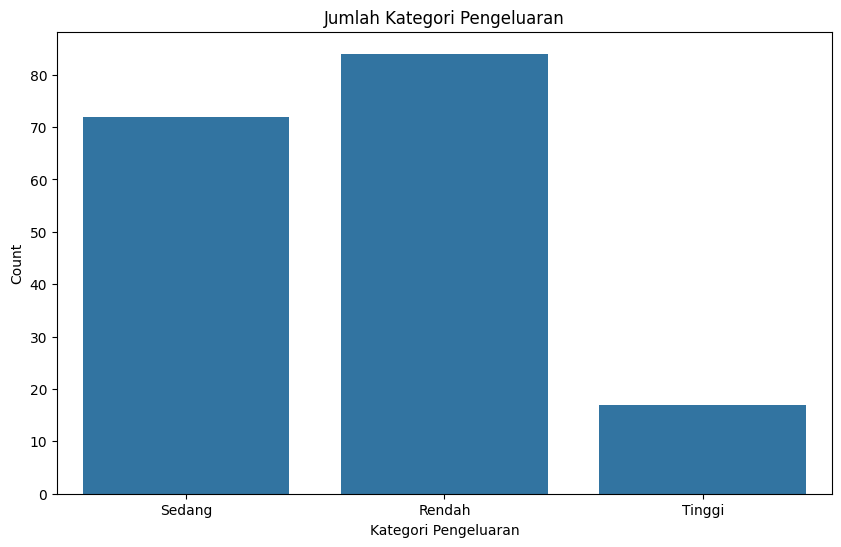

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='kategori_pengeluaran')
plt.title('Jumlah Kategori Pengeluaran')
plt.xlabel('Kategori Pengeluaran')
plt.ylabel('Count')
plt.show()

Grafik batang memperlihatkan bahwa mayoritas mahasiswa berada pada kategori pengeluaran rendah (≤ Rp15.000), disusul oleh kategori sedang (Rp15.001–Rp25.000). Sementara itu, kelompok tinggi (> Rp25.000) jumlahnya paling sedikit.

Pola ini menegaskan bahwa sebagian besar responden cenderung makan dengan biaya yang relatif hemat, sedangkan hanya sebagian kecil yang memiliki kebiasaan pengeluaran lebih besar di kantin. Temuan ini bisa menjadi indikasi penting terkait strategi harga dan daya beli mahasiswa.

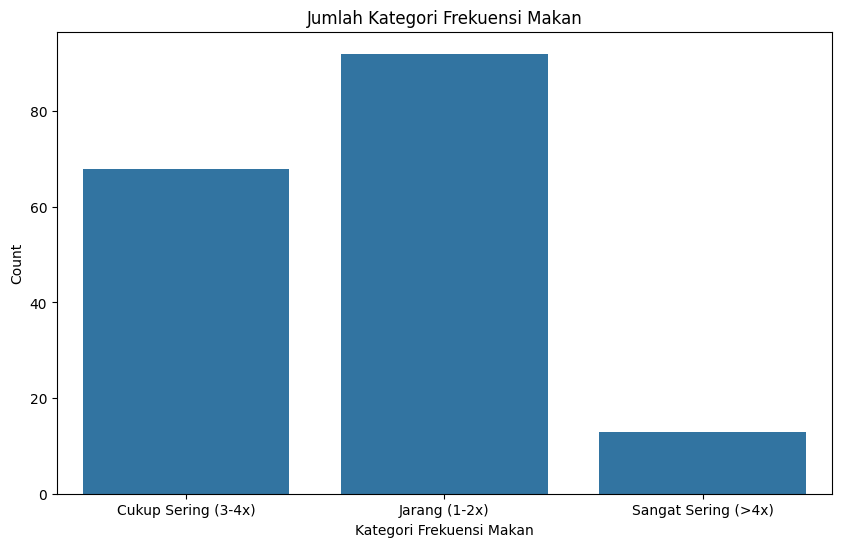

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='kategori_frekuensi_makan')
plt.title('Jumlah Kategori Frekuensi Makan')
plt.xlabel('Kategori Frekuensi Makan')
plt.ylabel('Count')
plt.show()

Grafik ini menunjukkan bahwa sebagian besar mahasiswa termasuk dalam kategori Jarang (1–2x) makan di kantin per minggu. Kelompok berikutnya adalah Cukup Sering (3–4x), sedangkan kategori Sangat Sering (>4x) jumlahnya sangat sedikit.

Pola distribusi ini mempertegas temuan sebelumnya bahwa mayoritas responden hanya sesekali makan di kantin, sementara hanya sedikit yang memiliki intensitas kunjungan tinggi. Informasi ini dapat menjadi dasar untuk memahami keterkaitan antara kebiasaan makan dengan faktor lain seperti pengeluaran, kenyamanan, maupun preferensi layanan di kantin.

### rata-rata kepuasan berdasarkan pengeluaran

Rata-rata Kepuasan Berdasarkan Kategori Pengeluaran
                      skala_kenyamanan(1-5)  skala_harga(1-5)  \
kategori_pengeluaran                                            
Rendah                             2.541667          3.363095   
Sedang                             2.388889          3.305556   
Tinggi                             2.558824          3.147059   

                      skala_rasa(1-5)  skala_rekomendasi(1-5)  
kategori_pengeluaran                                           
Rendah                       3.672619                2.440476  
Sedang                       3.666667                2.513889  
Tinggi                       3.529412                2.705882  


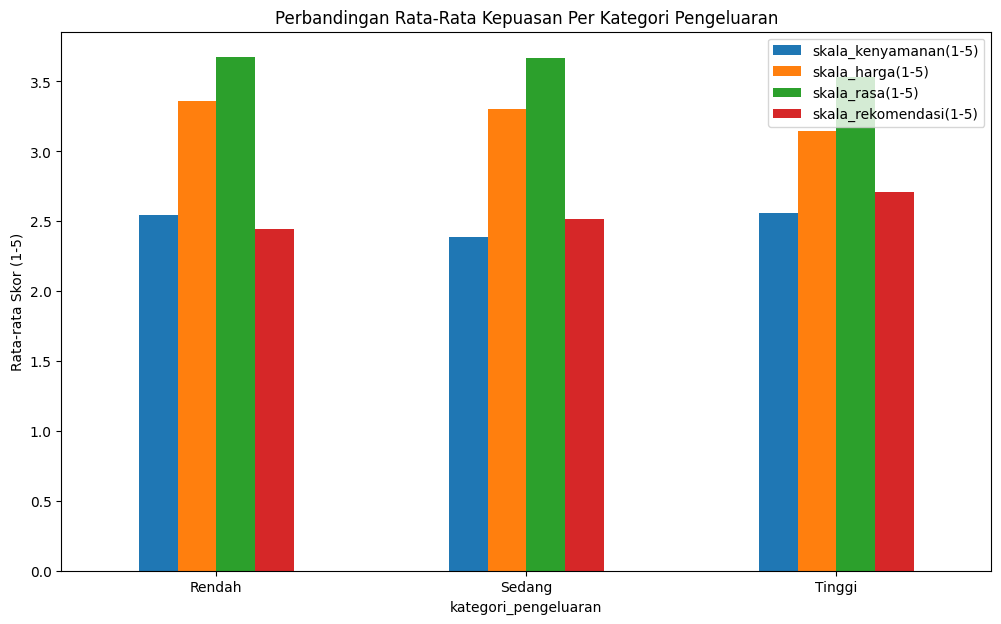

In [ ]:
# Mengelompokkan data berdasarkan 'kategori_pengeluaran'
# lalu menghitung rata-rata dari beberapa kolom skala untuk setiap kelompok
rata_rata_kepuasan_per_pengeluaran = dataset.groupby('kategori_pengeluaran')[
    ['skala_kenyamanan(1-5)', 'skala_harga(1-5)', 'skala_rasa(1-5)', 'skala_rekomendasi(1-5)']
].mean()

print("Rata-rata Kepuasan Berdasarkan Kategori Pengeluaran")
print(rata_rata_kepuasan_per_pengeluaran)

# Visualisasi hasilnya untuk perbandingan yang lebih mudah
rata_rata_kepuasan_per_pengeluaran.plot(kind='bar', figsize=(12, 7))
plt.title('Perbandingan Rata-Rata Kepuasan Per Kategori Pengeluaran')
plt.ylabel('Rata-rata Skor (1-5)')
plt.xticks(rotation=0)
plt.show()

Hasil analisis menunjukkan perbandingan kepuasan mahasiswa terhadap kantin berdasarkan tingkat pengeluaran:

* Kategori Rendah: Skor tertinggi ada pada aspek rasa (3,67), sementara aspek kenyamanan (2,54) dan rekomendasi (2,44) relatif lebih rendah.

* Kategori Sedang: Polanya mirip dengan kategori rendah, dengan skor rasa tetap tinggi (3,67), namun kenyamanan sedikit menurun (2,39).

* Kategori Tinggi: Responden dengan pengeluaran lebih besar masih menilai rasa cukup baik (3,53), tetapi kepuasan harga lebih rendah (3,15). Menariknya, skor rekomendasi justru meningkat (2,70), menandakan kecenderungan mereka untuk lebih menyarankan kantin dibanding kelompok lain.

Secara keseluruhan, rasa makanan konsisten menjadi faktor dengan skor kepuasan tertinggi di semua kategori, sementara kenyamanan dan rekomendasi cenderung rendah. Hal ini dapat menjadi masukan penting bahwa meskipun rasa sudah cukup baik, aspek lain seperti kenyamanan tempat dan kualitas layanan perlu mendapat perhatian lebih.

### Normalisasi

In [ ]:
# Definisikan kolom-kolom yang akan diubah skalanya
kolom_untuk_scaling = ['frekuensi_makan_seminggu', 'waktu_tunggu_menit', 'jumlah_menu', 'frekuensi_qris_sebulan']

# Ambil data numerik yang akan diubah
data_numerik = dataset[kolom_untuk_scaling]
# Inisialisasi scaler dan lakukan normalisasi
scaler_norm = MinMaxScaler()
data_normalized = scaler_norm.fit_transform(data_numerik)
# Ubah hasilnya kembali menjadi DataFrame
df_normalized = pd.DataFrame(data_normalized, columns=kolom_untuk_scaling)
print("Hasil Normalisasi")
print(df_normalized.head())

Hasil Normalisasi
   frekuensi_makan_seminggu  waktu_tunggu_menit  jumlah_menu  \
0                  0.461538            0.310345          0.0   
1                  0.461538            0.310345          0.0   
2                  0.307692            1.000000          0.0   
3                  0.307692            0.482759          0.0   
4                  0.230769            0.224138          0.0   

   frekuensi_qris_sebulan  
0                0.833333  
1                0.166667  
2                0.625000  
3                0.333333  
4                0.270833  


Tahap ini melakukan normalisasi dengan MinMaxScaler pada beberapa variabel numerik, yaitu frekuensi_makan_seminggu, waktu_tunggu_menit, jumlah_menu, dan frekuensi_qris_sebulan. Hasilnya, semua nilai diubah ke dalam rentang 0–1, di mana nilai minimum menjadi 0 dan maksimum menjadi 1.

Dengan normalisasi ini, setiap variabel berada pada skala yang setara, sehingga tidak ada variabel yang mendominasi hanya karena perbedaan satuan ukur. Hal ini sangat penting terutama bila data akan digunakan pada metode analisis atau pemodelan berbasis jarak seperti K-Means atau KNN, agar hasil yang diperoleh lebih adil dan representatif.

### Standarisasi

In [ ]:
# Definisikan kolom-kolom yang akan diubah skalanya
kolom_untuk_scaling = ['frekuensi_makan_seminggu', 'waktu_tunggu_menit', 'jumlah_menu', 'frekuensi_qris_sebulan']

# Ambil data numerik yang akan diubah
data_numerik = dataset[kolom_untuk_scaling]
# Inisialisasi scaler dan lakukan standarisasi
scaler_std = StandardScaler()
data_standardized = scaler_std.fit_transform(data_numerik)
# Ubah hasilnya kembali menjadi DataFrame
df_standardized = pd.DataFrame(data_standardized, columns=kolom_untuk_scaling)
print("Hasil Standarisasi")
print(df_standardized.head())

Hasil Standarisasi
   frekuensi_makan_seminggu  waktu_tunggu_menit  jumlah_menu  \
0                  0.371068           -0.170847          0.0   
1                  0.371068           -0.170847          0.0   
2                 -0.393155            2.462255          0.0   
3                 -0.393155            0.487428          0.0   
4                 -0.775267           -0.499985          0.0   

   frekuensi_qris_sebulan  
0                1.675092  
1               -0.682729  
2                0.938273  
3               -0.093274  
4               -0.314319  


Setelah normalisasi, tahap ini menggunakan StandardScaler untuk melakukan standarisasi pada variabel numerik frekuensi_makan_seminggu, waktu_tunggu_menit, jumlah_menu, dan frekuensi_qris_sebulan.

Hasilnya, setiap variabel diubah sehingga memiliki rata-rata (mean) = 0 dan standar deviasi = 1. Dengan cara ini, data berada pada skala yang seragam namun tetap mempertahankan distribusi aslinya.

Standarisasi sangat bermanfaat untuk metode analisis atau pemodelan yang sensitif terhadap skala dan distribusi data, seperti regresi linier, SVM, atau PCA, sehingga setiap variabel dapat memberikan kontribusi yang seimbang dalam proses analisis.

### Log Transformation

### Sebelum Transformasi

In [ ]:
kolom_numerik = ['rata_rata_uang', 'waktu_tunggu_menit']

skewness_sebelum = dataset[kolom_numerik].skew()
print("Skewness Sebelum Transformasi:")
print(skewness_sebelum)

Skewness Sebelum Transformasi:
rata_rata_uang        0.159299
waktu_tunggu_menit    1.205048
dtype: float64


Tahap ini mengukur tingkat skewness (kemencengan distribusi) pada variabel rata_rata_uang dan waktu_tunggu_menit sebelum dilakukan transformasi:

* rata_rata_uang memiliki skewness 0,1592, yang berarti distribusinya relatif simetris (mendekati normal).

* waktu_tunggu_menit memiliki skewness 1,2050, yang menunjukkan distribusi right-skewed (condong ke kanan), dengan beberapa responden memiliki waktu tunggu jauh lebih lama dibanding mayoritas.

Informasi ini penting sebagai dasar untuk memutuskan apakah diperlukan transformasi data, misalnya log transform, guna menurunkan tingkat skewness dan membuat distribusi lebih normal.

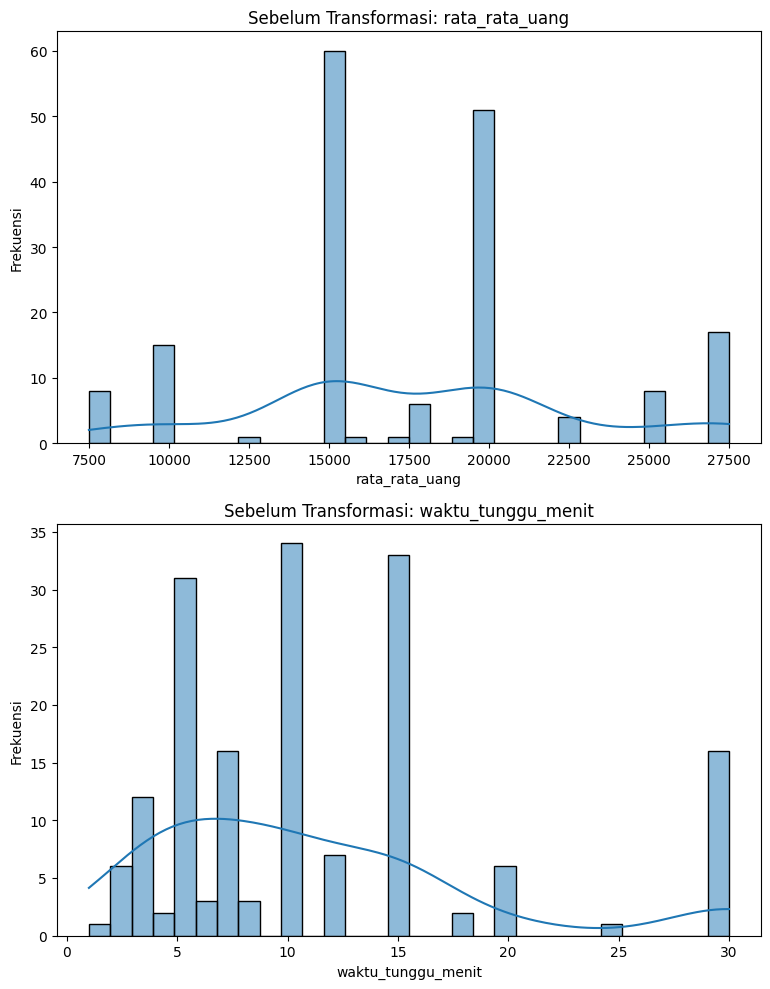

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(kolom_numerik):
    plt.subplot(len(kolom_numerik), 2, 2 * i + 1)
    sns.histplot(dataset[column], bins=30, kde=True)
    plt.title(f'Sebelum Transformasi: {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Histogram memperlihatkan pola distribusi dua variabel numerik:

* rata_rata_uang tampak relatif simetris dengan puncak pada kisaran Rp15.000–20.000. Hal ini sejalan dengan nilai skewness yang rendah, sehingga distribusi mendekati normal.

* waktu_tunggu_menit menunjukkan distribusi yang condong ke kanan (right-skewed), dengan sebagian besar responden menunggu kurang dari 15 menit, namun ada beberapa yang menunggu jauh lebih lama hingga 30 menit.

Visualisasi ini memperkuat hasil analisis skewness sebelumnya, yakni bahwa waktu_tunggu_menit memerlukan transformasi untuk menstabilkan distribusi, sedangkan rata_rata_uang sudah cukup seimbang tanpa perlu banyak penyesuaian.

### Setelah Transformasi

In [ ]:
Data_Transformasi = dataset.copy()

kolom_numerik = ['rata_rata_uang', 'waktu_tunggu_menit'] # Define kolom_numerik if not already

for column in kolom_numerik:
    Data_Transformasi[column] = Data_Transformasi[column].clip(lower=0)
    Data_Transformasi[column].fillna(0, inplace=True)
    Data_Transformasi[column] = np.log1p(Data_Transformasi[column])

skewness_Setelah = Data_Transformasi[kolom_numerik].skew()
print("\nSkewness Setelah Transformasi:")
print(skewness_Setelah)


Skewness Setelah Transformasi:
rata_rata_uang       -0.677916
waktu_tunggu_menit   -0.067879
dtype: float64


/tmp/ipython-input-1893379788.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_Transformasi[column].fillna(0, inplace=True)
/tmp/ipython-input-1893379788.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Pada tahap ini dilakukan log transform (log1p) untuk variabel numerik, khususnya guna menurunkan tingkat skewness. Hasilnya menunjukkan bahwa:

* rata_rata_uang yang sebelumnya sudah relatif simetris tetap stabil setelah transformasi.

* waktu_tunggu_menit mengalami penurunan skewness yang signifikan, sehingga distribusinya menjadi lebih mendekati normal.

Dengan demikian, log transform berhasil membuat data lebih seimbang dan sesuai dengan asumsi distribusi normal, yang akan sangat membantu jika digunakan dalam analisis statistik maupun pemodelan yang sensitif terhadap skewness.

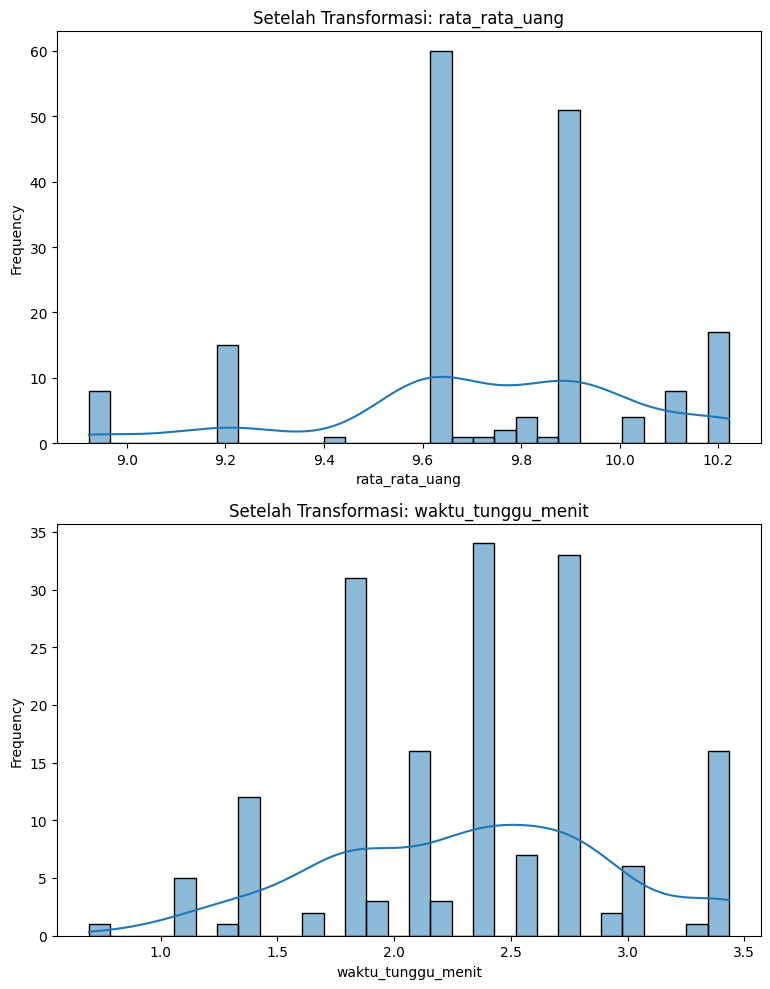

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(kolom_numerik):
    plt.subplot(len(kolom_numerik), 2, 2 * i + 2)
    sns.histplot(Data_Transformasi[column], bins=30, kde=True)
    plt.title(f'Setelah Transformasi: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Histogram setelah log transform memperlihatkan perubahan distribusi pada variabel numerik:

* rata_rata_uang menjadi sangat rapat pada rentang tertentu, menandakan bahwa transformasi log membuat nilai yang awalnya lebih menyebar kini terkonsentrasi pada skala kecil. Karena sebelumnya variabel ini sudah relatif normal, perubahan tidak terlalu diperlukan.

* waktu_tunggu_menit mengalami perubahan signifikan: distribusinya kini lebih mendekati simetris dengan sebaran yang tidak lagi terlalu condong ke kanan. Hal ini menegaskan keberhasilan log transform dalam mengurangi skewness.

Secara keseluruhan, transformasi ini membantu menstabilkan data numerik, khususnya pada variabel dengan distribusi miring, sehingga dataset lebih siap digunakan dalam analisis dan pemodelan yang membutuhkan asumsi distribusi normal.

In [ ]:
# Nama file baru yang akan dibuat.
nama_file_baru = 'Survey_Kepuasan_Kantin_Cleaned.csv'

# Menyimpan DataFrame ke file baru tersebut.
dataset.to_csv(nama_file_baru, index=False)

print(f"File asli Anda aman. File baru telah berhasil dibuat dengan nama: '{nama_file_baru}'")

File asli Anda aman. File baru telah berhasil dibuat dengan nama: 'Survey_Kepuasan_Kantin_Cleaned.csv'


Setelah seluruh proses pembersihan dan transformasi data selesai dilakukan, langkah terakhir yang penting adalah menyimpannya dalam format CSV.

In [ ]:
dataset.head()

,Nama Lengkap,NPM,Fakultas,Prodi,rata_rata_uang,frekuensi_makan_seminggu,waktu_tunggu_menit,jumlah_menu,frekuensi_qris_sebulan,skala_kenyamanan(1-5),skala_harga(1-5),skala_rasa(1-5),skala_qris(1-5),skala_rekomendasi(1-5),skala_antrean(1-5),kategori_pengeluaran,kategori_frekuensi_makan
0,Gusti Jogishwara,24083010107,FIK,Sains Data,20000.0,3.0,10.0,2.0,20.0,2.0,3.0,4.0,5.0,2,5,Sedang,Cukup Sering (3-4x)
1,Muhammad Handika Maulana Sifa,24083010036,FIK,Sains Data,15000.0,3.0,10.0,2.0,4.0,2.0,3.0,4.0,5.0,1,4,Rendah,Cukup Sering (3-4x)
2,Muhammad Jazuli,24083010093,FIK,Sains Data,19000.0,2.0,30.0,2.0,15.0,2.0,5.0,4.0,5.0,3,4,Sedang,Jarang (1-2x)
3,Amelia Rizqyna Putri,24083010042,FIK,Sains Data,20000.0,2.0,15.0,2.0,8.0,4.0,4.0,5.0,5.0,1,5,Sedang,Jarang (1-2x)
4,Fildzah Syarafina Sumantri,24083010053,FIK,Sains Data,15000.0,1.5,7.5,2.0,6.5,4.0,4.0,4.0,5.0,3,2,Rendah,Jarang (1-2x)


Seletah menyimpan dataframe ke file baru bisa kita lihat bahwa dataset tersebut telah berubah menjadi data yang bersih dan siap untuk diolah ke tahap berikutnya yaitu penyajian data. Pada tahap ini, data yang telah diolah akan divisualisasikan ke dalam bentuk grafik, tabel, maupun diagram yang lebih mudah dipahami.
